<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Principal%20component%20analysis/PCA_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create some data

In [20]:
# feature names  -- lets create 100 features
feature_names = ['feature'+str(i+1) for i in range(100)]

# index name -- lets create 10 samples belonging to two class -- class A and class B
classA = ['classA-'+str(i+1) for i in range(5)]
classB = ['classB-'+str(i+1) for i in range(5)]
index_names = [*classA, *classB]

# Lets create a dataframe
from numpy.random import default_rng

data = pd.DataFrame(index=index_names,columns=feature_names)
for feat in data.columns:
  rng = default_rng()
  data.loc['classA-1':'classA-5', feat] = rng.poisson(rng.integers(10,1000), size=(5))
  data.loc['classB-1':'classB-5', feat] = rng.poisson(rng.integers(10,1000), size=(5))


data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100
classA-1,106,634,700,380,350,525,245,922,490,503,...,154,395,290,606,649,139,62,556,158,70
classA-2,102,614,693,378,343,550,257,918,523,520,...,124,402,268,606,615,145,48,610,161,68
classA-3,90,640,719,367,342,521,261,890,539,496,...,123,412,313,561,607,127,58,639,170,78
classA-4,97,625,696,390,334,513,230,840,468,494,...,127,388,311,578,607,146,64,613,174,71
classA-5,96,643,699,376,378,534,250,871,504,471,...,120,433,294,635,638,139,67,638,158,75


## Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

## Perform PCA on the data

In [27]:
from sklearn.decomposition import PCA

# Initalize an instance 
pca = PCA() # Number of components to keep : if n_components is not set all components are kept:
pca.fit(scaled_data)
# get PCA coordinates for scaled_data
pca_data = pca.transform(scaled_data)

## Draw a scree plot and a PCA plot

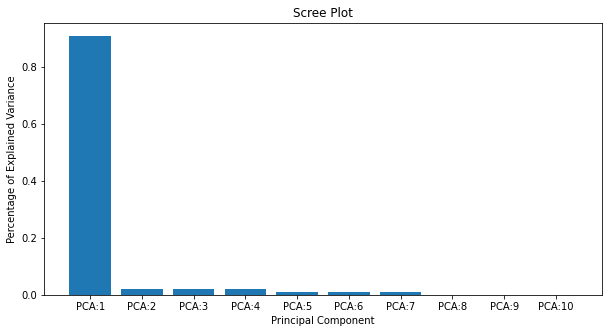

In [37]:
# Percentage of variance explained by each of the selected components.
variance = np.round(pca.explained_variance_ratio_,decimals=2)
labels = ['PCA:'+str(i+1) for i in range(len(variance))]

plt.figure(figsize=(10,5))
plt.bar(range(1,len(variance)+1), variance, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [38]:
# plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=index_names, columns=labels)
pca_df

,PCA:1,PCA:2,PCA:3,PCA:4,PCA:5,PCA:6,PCA:7,PCA:8,PCA:9,PCA:10
classA-1,-9.515687,-1.992858,0.128585,1.335696,-0.376535,-0.572979,0.269991,-0.853603,-1.004458,1.957734e-15
classA-2,-9.625628,0.434777,1.633723,-2.043273,-0.995215,-0.919923,-0.780457,-0.147923,0.386638,5.717619e-16
classA-3,-9.653006,1.787895,-0.412115,-0.337388,2.409093,0.358921,0.089145,-0.655284,0.068702,-4.253946e-16
classA-4,-9.647023,-1.190754,-0.483832,-1.253622,-0.449066,1.550311,0.535063,0.888430,-0.244068,-7.493372e-16
classA-5,-9.369416,0.911656,-0.811116,2.351395,-0.556265,-0.438489,-0.103690,0.794191,0.806492,-3.222936e-16
classB-1,9.182162,0.209464,-2.190227,-0.248818,-1.139748,0.666683,-0.892538,-0.903897,0.236485,9.019417e-16
classB-2,9.800103,-2.135728,0.409092,-0.262211,0.626741,-0.314644,1.047050,-0.266790,1.113322,1.062519e-15
classB-3,9.715419,0.409159,2.632882,1.315665,0.117421,1.091629,-0.647031,0.055025,-0.161428,-9.537348e-17
classB-4,9.433465,2.419597,-0.022164,-0.385226,-0.859523,-0.491614,1.390002,0.120860,-0.595686,4.991384e-16
classB-5,9.679613,-0.853207,-0.884827,-0.472219,1.223097,-0.929893,-0.907536,0.968992,-0.606000,-1.320328e-16


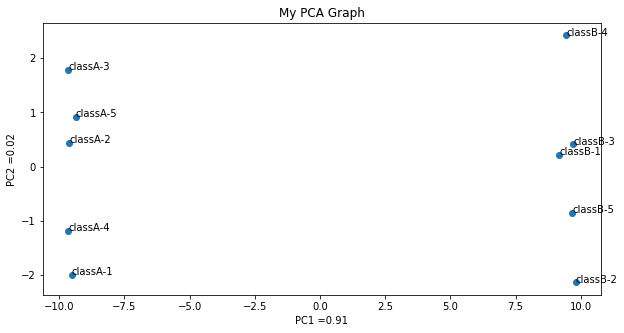

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(pca_df['PCA:1'],pca_df['PCA:2'])
plt.title('My PCA Graph')
plt.xlabel('PC1 ={}'.format(variance[0]))
plt.ylabel('PC2 ={}'.format(variance[1]))
for idx in pca_df.index:
  plt.annotate(idx, (pca_df.loc[idx,'PCA:1'],pca_df.loc[idx,'PCA:2']))

plt.show()

## Determine which features had the biggest influence on PC1

In [51]:
## get the name of the top 10 measurements (features) that contribute most to pc1.
## first, get the loading scores for pc1
loading_scores = pd.DataFrame(pca.components_[0], index=feature_names, columns=['loading_scores'])
sorted_index = loading_scores.abs().sort_values(by='loading_scores',ascending=False).index.values
# name of the top 10 measurements
loading_scores.loc[sorted_index,:].head(10)

,loading_scores
feature71,0.104519
feature14,0.104498
feature91,0.104494
feature42,0.104478
feature63,0.104470
feature50,-0.104450
feature84,0.104449
feature87,0.104414
feature85,0.104413
feature20,-0.104397
